In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning & Deep Learning Projects/Credit Card Customer Churn Prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Dataset Description**

### Bank Customer Churn Dataset — Description

This dataset contains information about bank customers and whether they have **exited (churned)** the bank or not. It is commonly used for **classification problems**, especially **customer churn prediction**.

---

### 📊 Dataset Overview
- **Rows**: Each row represents a unique bank customer  
- **Target Variable**: `Exited` (whether the customer left the bank)
- **Use Case**: Churn analysis, customer behavior modeling, classification ML problems

---

### 🧾 Column Descriptions

| Column Name | Description | Data Type |
|------------|-------------|----------|
| **RowNumber** | Index number of the record (not useful for modeling) | Integer |
| **CustomerId** | Unique identifier for each customer | Integer |
| **Surname** | Customer’s last name | Categorical |
| **CreditScore** | Credit score of the customer (higher = better creditworthiness) | Integer |
| **Geography** | Country of the customer (e.g., France, Spain, Germany) | Categorical |
| **Gender** | Gender of the customer | Categorical |
| **Age** | Age of the customer in years | Integer |
| **Tenure** | Number of years the customer has been with the bank | Integer |
| **Balance** | Account balance of the customer | Float |
| **NumOfProducts** | Number of bank products used by the customer | Integer |
| **HasCrCard** | Whether the customer has a credit card (1 = Yes, 0 = No) | Binary |
| **IsActiveMember** | Whether the customer is an active bank member (1 = Yes, 0 = No) | Binary |
| **EstimatedSalary** | Estimated annual salary of the customer | Float |
| **Exited** | Whether the customer left the bank (1 = Yes, 0 = No) | **Target (Binary)** |

---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# drop the RowNumber, CustomerId, Surname columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### **Univariate Analysis**

In [7]:
def univariate_num(df, col):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))

  # histogram plot
  sns.histplot(df, x=col, kde=True, ax=ax[0])
  # box plot
  sns.boxplot(df, y=col, ax=ax[1])

  # set the title of the figures
  fig.suptitle(f'Distribution of {col}', fontsize=15)

  plt.tight_layout()
  plt.show()

  # print the summary stats and skewness
  print('Summary Statistics', end="\n\n")
  print(df[col].describe())
  print(f'Skewness: {df[col].skew()}')

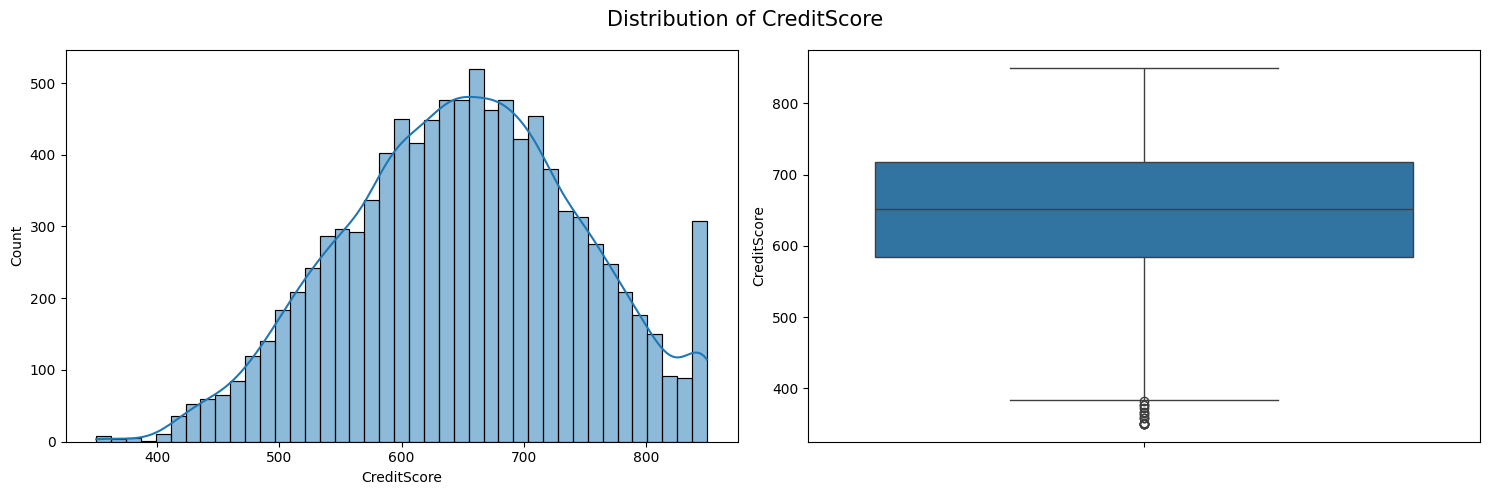

Summary Statistics

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
Skewness: -0.07160660820092675


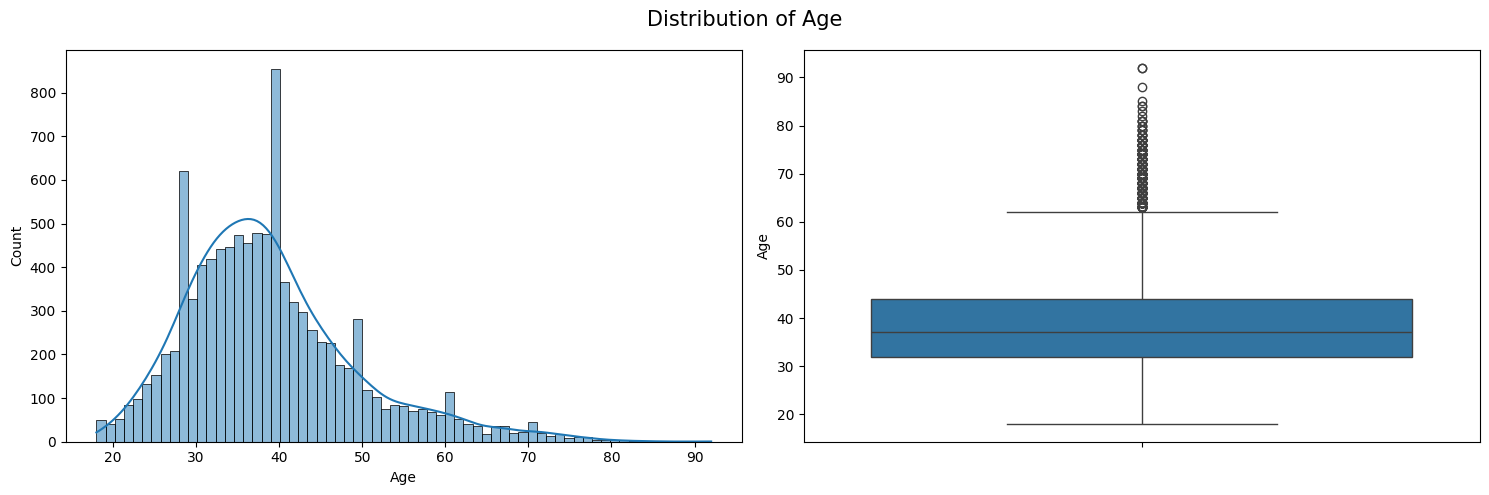

Summary Statistics

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64
Skewness: 1.0113202630234552


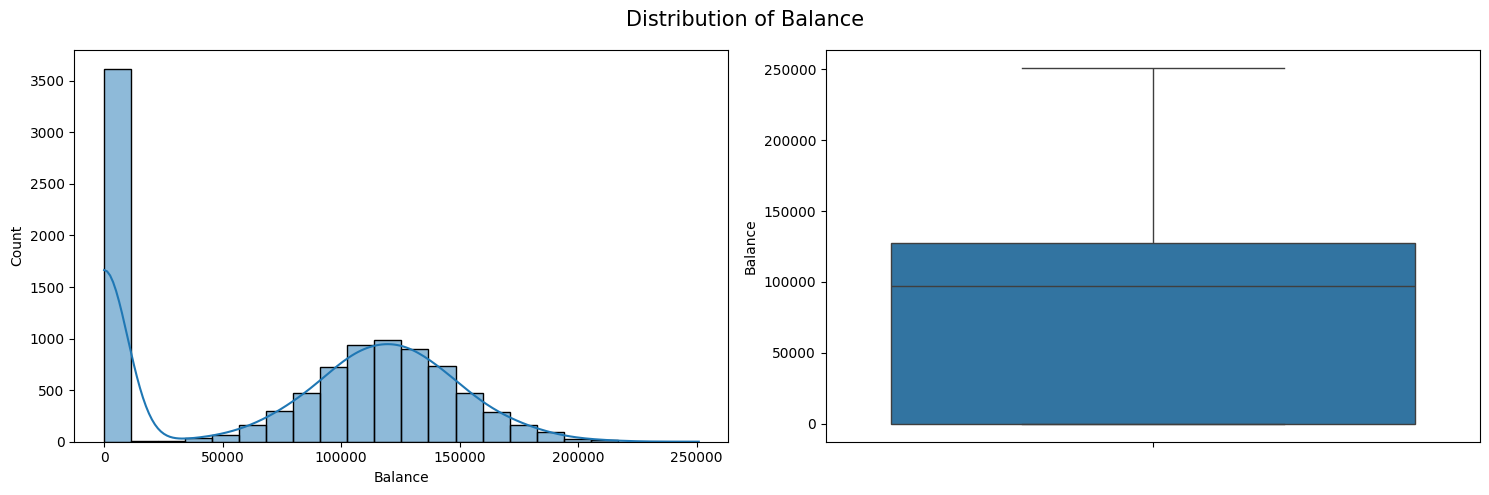

Summary Statistics

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
Skewness: -0.14110871094154384


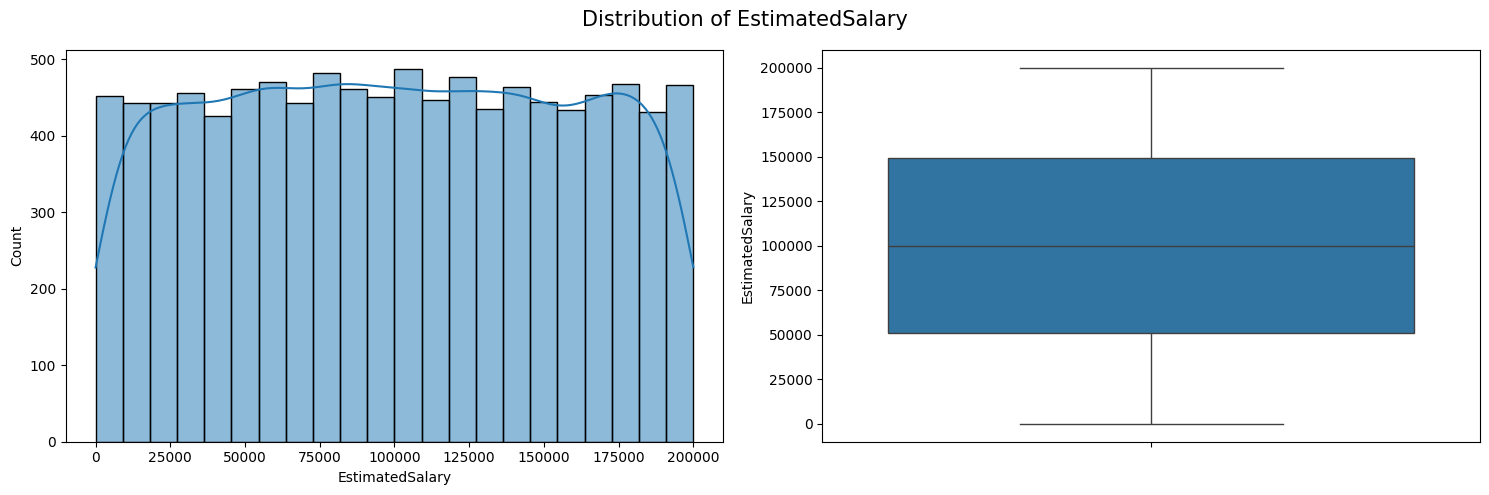

Summary Statistics

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64
Skewness: 0.0020853576615585162


In [8]:
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for numerical_col in numerical_cols:
  univariate_num(df, numerical_col)

**Conclusions**

1. CreditScore shows a normal distribution with few outliers.
2. Age is moderately right skewed with lots of outliers.
3. Balance shows a bimodal distribution with one strong peak at $0$.
4. EstimatedSalary shows a uniform distribution.

In [9]:
def univariate_cat(df, col):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))

  # bar plot
  sns.countplot(df, x=col, ax=ax[0])

  # pie chart
  categories = df[col].value_counts().index
  ax[1].pie(df[col].value_counts(), autopct="%.2f%%", labels=categories)

  # set the title of the figures
  fig.suptitle(f'Distribution of {col}', fontsize=15)

  plt.tight_layout()
  plt.show()
  print()

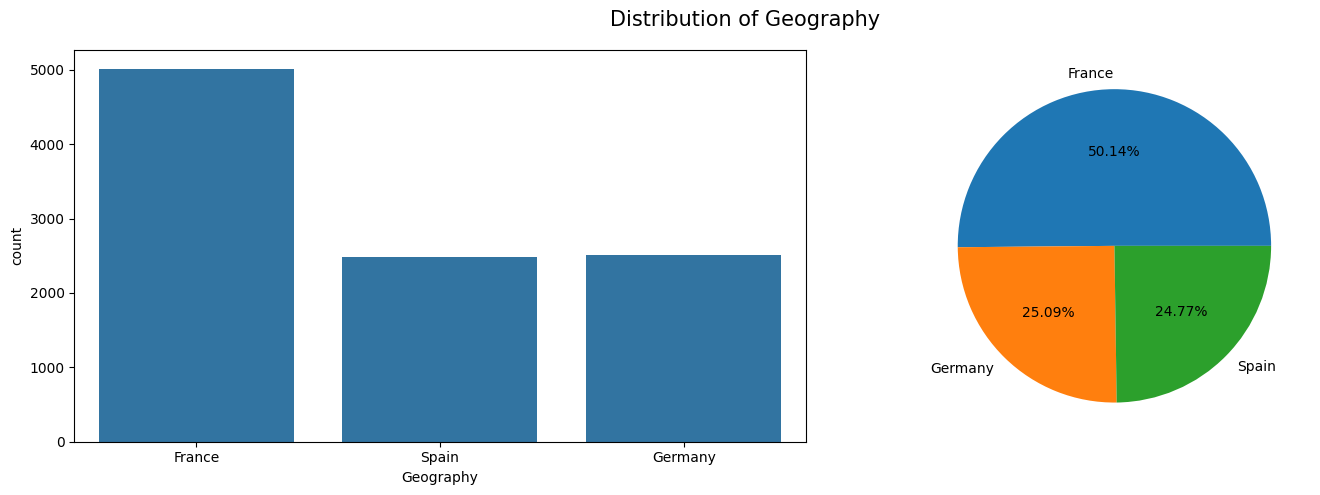

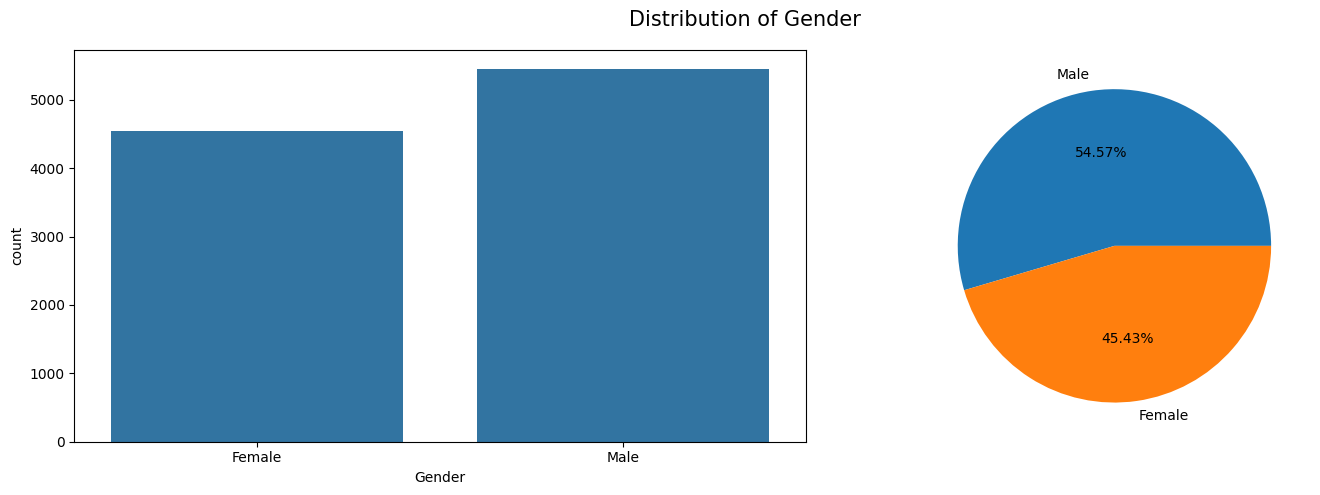

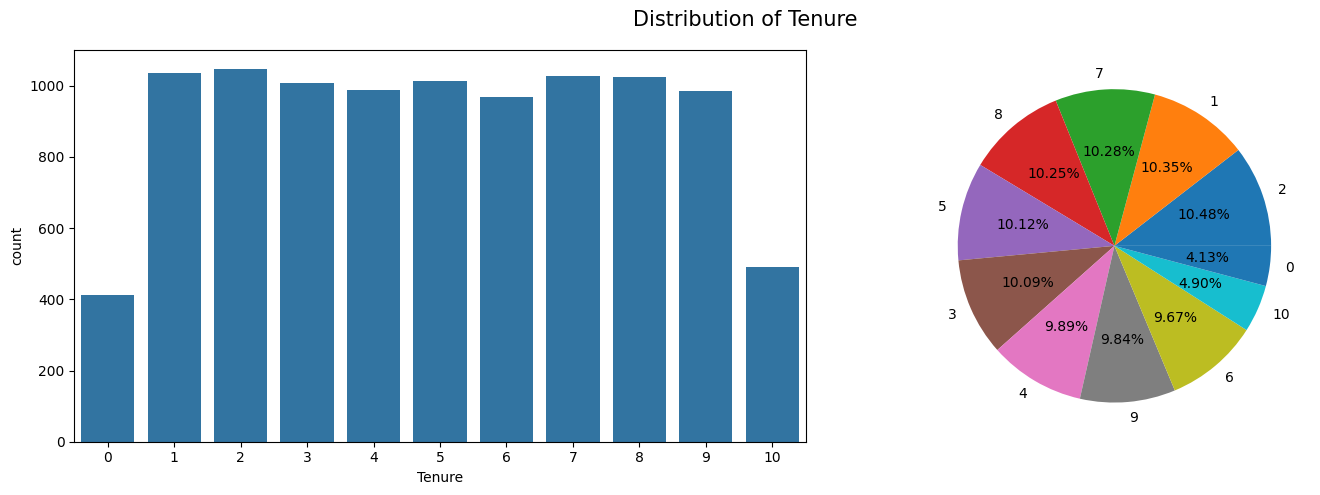

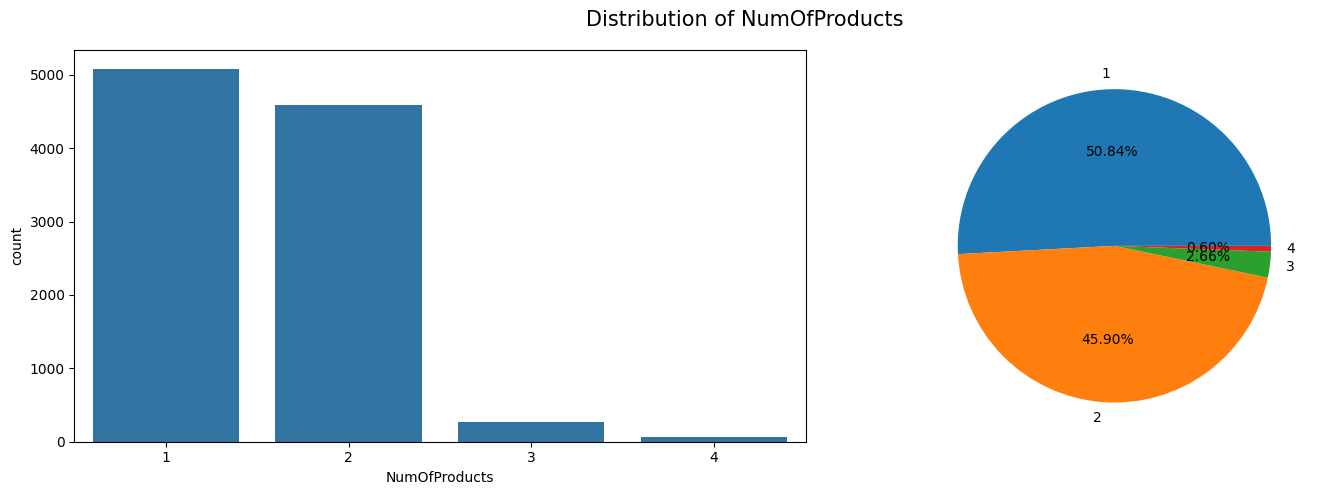

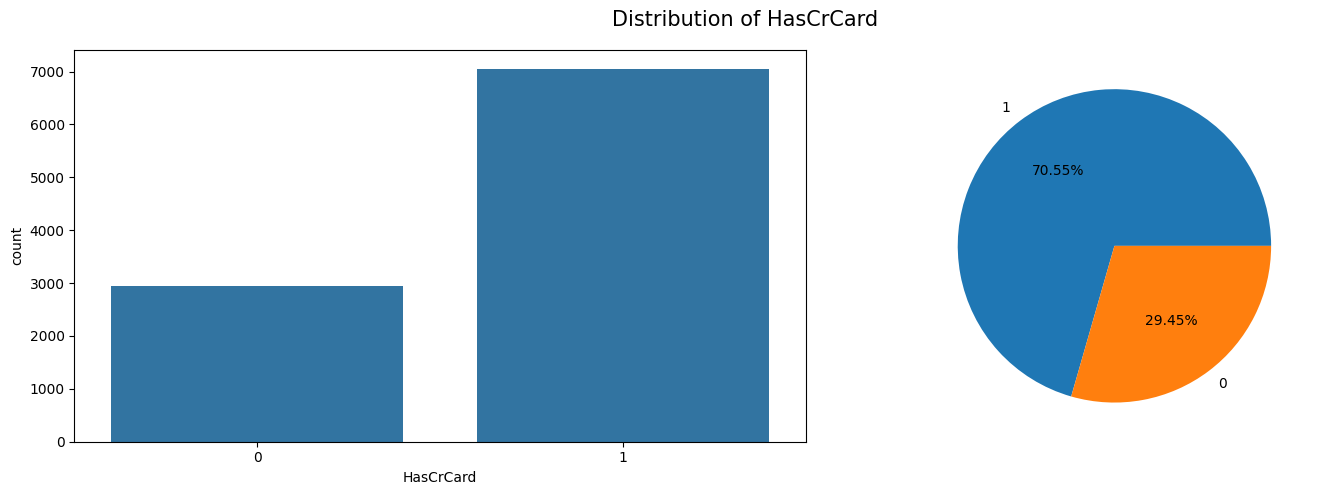

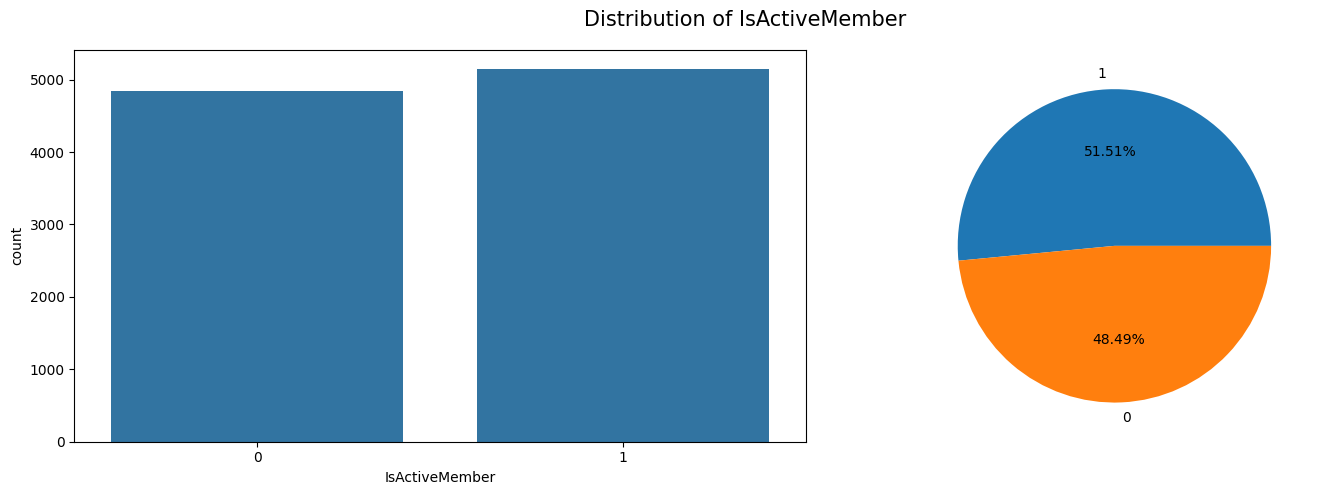

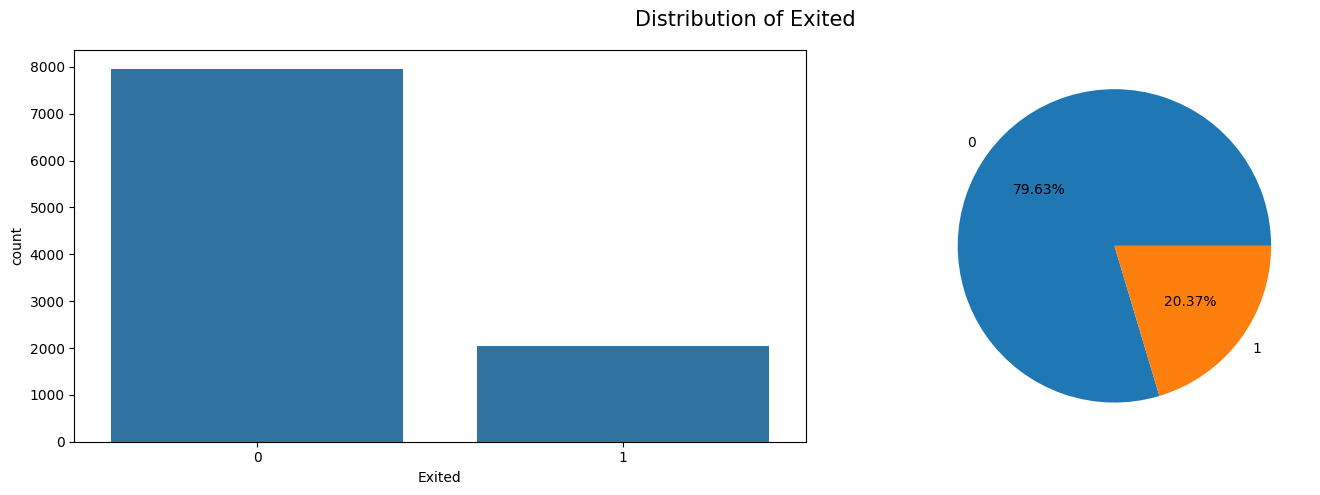

In [10]:
categorical_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

for categorical_col in categorical_cols:
    univariate_cat(df, categorical_col)

**Conclusions**

1. The Geography feature shows an imbalanced distribution, with France contributing ~50% of the customers, while Spain and Germany each contribute ~25%. This indicates that the dataset is France-dominant, with Spain and Germany forming two similarly sized minority groups.
2. The Gender feature shows a almost balanced distribution.
3. The Tenure feature shows an imbalanced distribution, it value ranges from 0 to 10, customers of 0 and 10 yrs tenure are almost equal in number, customers having tenure 1 to 9 are also almost equal in number.
4. The NumOfProducts feature shows imbalanced distribution, majority of the customers uses 1 or 2 products, very few customers uses 3 or 4 products.
5. The distribution of HasCrCard shows imbalanced distribution, majority of the customers have credit card and customers not having credit card are in minority.
6. The IsActiveMember feature shows almost equal distribution.
7. The Exited column is moderately imbalanced where not exited customers are in majority.

### **Bivariate Analysis**

**1.CreditScore vs Exited**

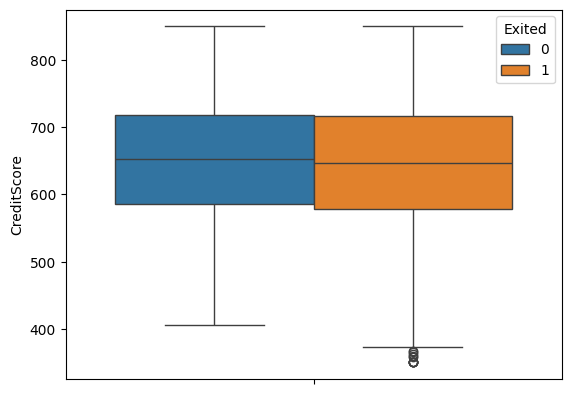

In [11]:
sns.boxplot(df, y='CreditScore', hue='Exited')
plt.show()

In [12]:
df.groupby('Exited')['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


**Conclusion**

The distribution of exited and not exited customers are almost same.

**2. Age vs Exited**

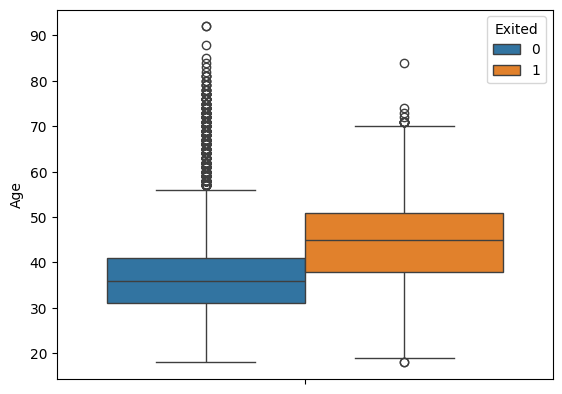

In [13]:
sns.boxplot(df, y='Age', hue='Exited')
plt.show()

In [14]:
df.groupby('Exited')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


**Conclusion**

The boxplot indicates a clear shift toward higher ages among customers who exited, suggesting that churn probability increases with age. However, a substantial number of older customers remain retained, indicating that age alone does not determine churn. This implies the presence of other moderating factors or satisfaction with banking services.

**3. Balance vs Exited**

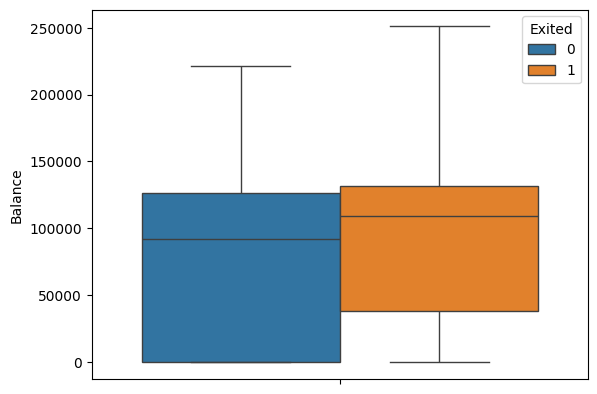

In [15]:
sns.boxplot(df, y='Balance', hue='Exited')
plt.show()

In [16]:
df.groupby('Exited')['Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


**Conclusion**

Majority of the non-exited persons have $0$ balance amount in their account, customers having high balance are more likely to exit.

**4. EstimatedSalary vs Churn**

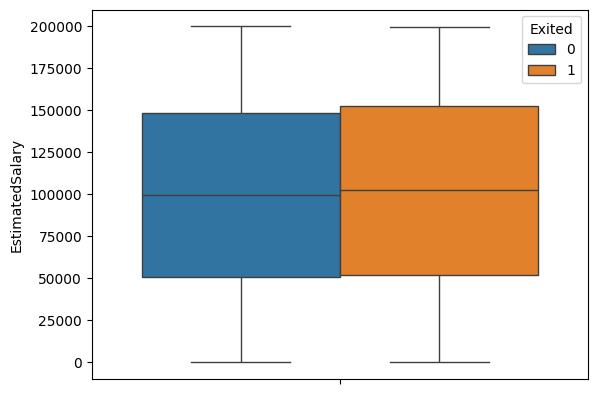

In [17]:
sns.boxplot(df, y='EstimatedSalary', hue='Exited')
plt.show()

In [18]:
df.groupby('Exited')['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


**Conclusion**

The box plot indicates that customers having slight high EstimatedSalary are more likely to exit but Exited column isn't affected much by EstimatedSalary feature.

**5. Geography vs Exited**

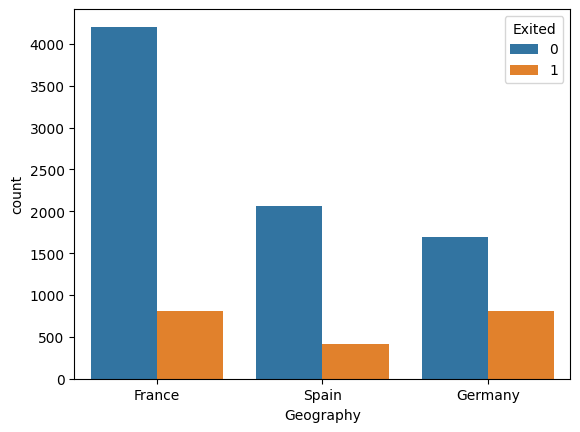

In [19]:
sns.countplot(df, x='Geography', hue='Exited')
plt.show()

**Conclusion**

Customers from Germany are more likely to exit.

**6. Gender vs Exited**

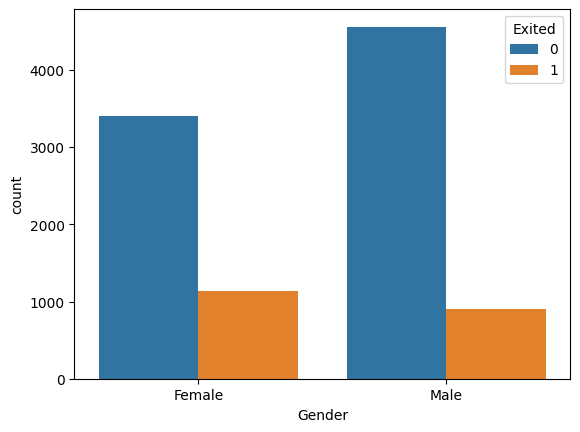

In [20]:
sns.countplot(df, x='Gender', hue='Exited')
plt.show()

**Conclusion**

Female customers are slightly more likely to exit than male customers.

**7. Tenure vs Exited**

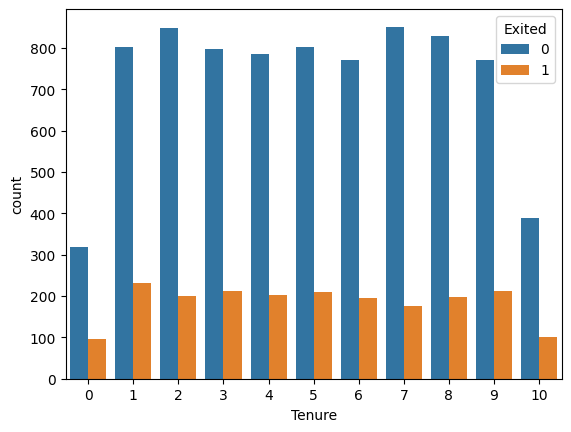

In [21]:
sns.countplot(df, x='Tenure', hue='Exited')
plt.show()

**Conclusion**

Exited column isn't affected by Tenure.

**8. NumOfProducts vs Exited**

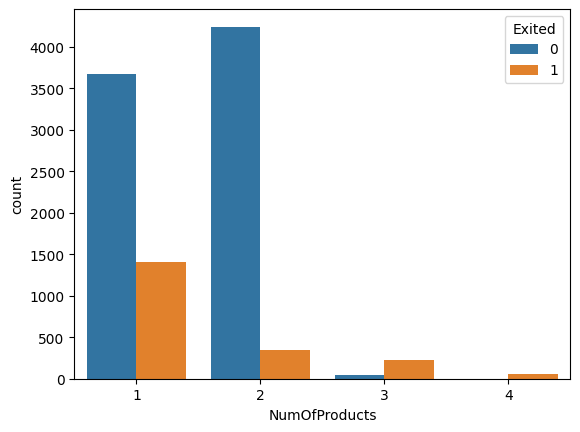

In [22]:
sns.countplot(df, x='NumOfProducts', hue='Exited')
plt.show()

**Conclusion**

Customers using more number of products of bank are more likely to exit.

**9. HasCrCard vs Exited**

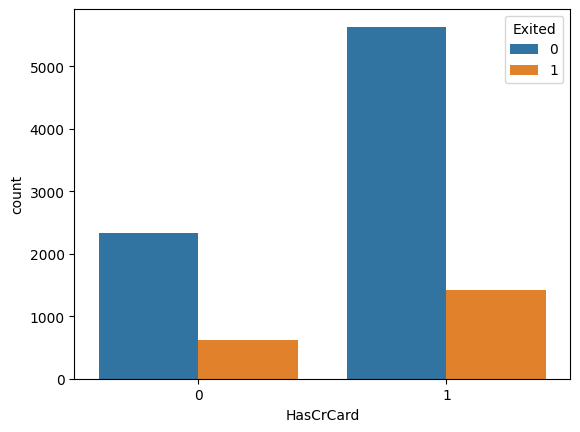

In [23]:
sns.countplot(df, x='HasCrCard', hue='Exited')
plt.show()

**Conclusion**

Customers using credit card are slightly more likely to exit.

**10. IsActiveMember vs Exited**

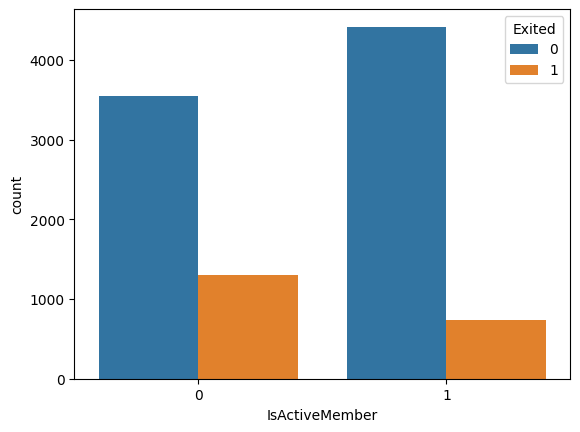

In [24]:
sns.countplot(df, x='IsActiveMember', hue='Exited')
plt.show()

**Conclusion**

Customers who are not active are more likely to exit.

## **Multivariate Analysis**

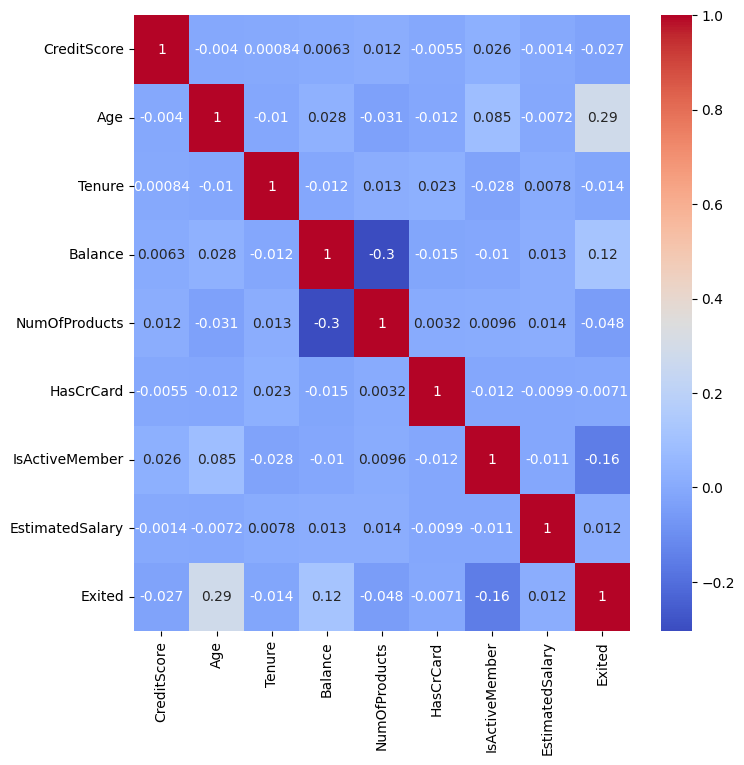

In [25]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

**Conclusion**

Exited shows a little bit of correlation with Age and IsActiveMember feature.

In [28]:
# seperate the input and output features
X, y = df.drop('Exited', axis=1).iloc[:, :], df['Exited'].values
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [29]:
y

array([1, 0, 1, ..., 1, 1, 0])

## **Data Preprocessing**

Split the input data into train set (80%) and test set (20%), encode the Geography, Gender with One Hot Encoder and scale the features through column transformer.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [33]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(8000, 10)

In [34]:
X_test.shape

(2000, 10)

In [36]:
# define a transformer for preprocessing the input data
transformer = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), ['Geography', 'Gender']),
        ('scale', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
    ]
)

In [38]:
# transform the train and test set i.e. X_train and X_test
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)
X_train_transformed

array([[ 0.        ,  0.        ,  1.        , ...,  0.34567966,
        -1.21847056,  1.36766974],
       [ 1.        ,  0.        ,  1.        , ..., -0.3483691 ,
         0.69683765,  1.6612541 ],
       [ 0.        ,  1.        ,  1.        , ..., -0.69539349,
         0.61862909, -0.25280688],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.38944225,
        -1.21847056, -0.1427649 ],
       [ 0.        ,  0.        ,  1.        , ...,  1.03972843,
         1.8272593 , -0.05082558],
       [ 1.        ,  0.        ,  1.        , ..., -1.38944225,
         1.1497197 , -0.81456811]])

In [39]:
X_test_transformed

array([[ 1.        ,  0.        ,  1.        , ..., -0.69539349,
         0.32993735, -1.01960511],
       [ 0.        ,  0.        ,  1.        , ..., -1.38944225,
        -1.21847056,  0.79888291],
       [ 0.        ,  1.        ,  0.        , ..., -0.3483691 ,
        -1.21847056, -0.72797953],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.69270405,
        -1.21847056, -1.16591585],
       [ 0.        ,  0.        ,  1.        , ..., -0.3483691 ,
        -1.21847056, -0.41163463],
       [ 1.        ,  0.        ,  1.        , ..., -1.38944225,
         0.62825602,  0.12593183]])

## **Create ANN**

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [79]:
# First create a Sequential model after add layers in it
model = Sequential()

model.add(Dense(16, activation='relu', input_dim=X_train_transformed.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
history = model.fit(X_train_transformed, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6152 - loss: 0.6503 - val_accuracy: 0.8000 - val_loss: 0.4680
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7943 - loss: 0.4601 - val_accuracy: 0.7987 - val_loss: 0.4398
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8065 - loss: 0.4334 - val_accuracy: 0.8112 - val_loss: 0.4344
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8018 - loss: 0.4411 - val_accuracy: 0.8106 - val_loss: 0.4283
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8140 - loss: 0.4339 - val_accuracy: 0.8144 - val_loss: 0.4264
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7969 - loss: 0.4465 - val_accuracy: 0.8175 - val_loss: 0.4253
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8064 - loss: 0.4393 - val_accuracy: 0.8188 - val_loss: 0.4235
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8069 - loss: 0.4317 - val_accu

In [83]:
model.layers[0].get_weights()

[array([[ 6.56694233e-01,  2.55898774e-01, -1.91979222e-02,
          3.84599835e-01,  7.61886775e-01,  4.26276535e-01,
          5.96086919e-01,  3.58374178e-01, -1.18038547e+00,
          3.88672590e-01,  3.14799249e-01, -1.75139308e-01,
         -8.92871261e-01,  3.79612505e-01,  1.28794059e-01,
          9.07285896e-04],
        [-5.96546412e-01,  6.23002589e-01, -1.88905731e-01,
         -3.52186151e-02,  4.78737086e-01,  4.14269358e-01,
          3.99480522e-01, -1.31669652e+00,  2.16275349e-01,
         -1.44996569e-01, -9.87088501e-01, -1.97866606e-03,
          6.51630342e-01, -4.65316661e-02,  5.90570331e-01,
          1.52777418e-01],
        [-3.77261102e-01, -1.67663008e-01,  3.75851780e-01,
         -1.87274903e-01, -1.79443404e-01,  5.37178636e-01,
         -1.21340491e-01,  2.55514383e-02,  4.34640020e-01,
          3.65021646e-01, -6.78199589e-01, -1.06696022e+00,
         -5.96865825e-02,  8.45303684e-02,  6.93706125e-02,
          1.20475061e-01],
        [ 2.7597096

In [84]:
y_prob = model.predict(X_test_transformed)
y_prob

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.14881948],
       [0.17979223],
       [0.32023337],
       ...,
       [0.3082457 ],
       [0.04355187],
       [0.31102115]], dtype=float32)

In [85]:
y_pred = np.where(y_prob > 0.5, 1, 0)

In [86]:
accuracy_score(y_test, y_pred)

0.817

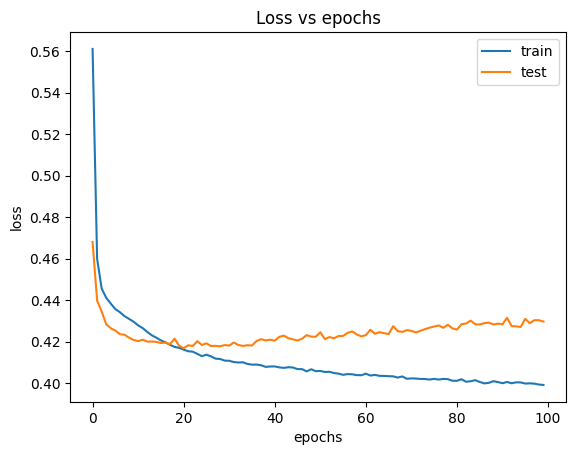

In [91]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs epochs')

plt.legend()
plt.show()

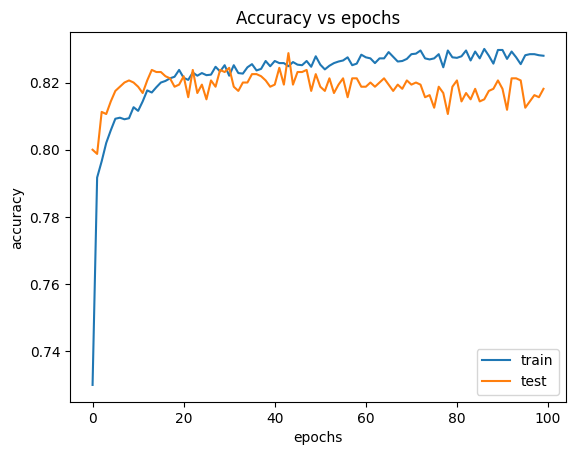

In [92]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs epochs')

plt.legend()
plt.show()